# U.S. Medical Insurance Costs

Goal of this project: Analyze the dataset to assess potential trends and draw conclusions to aid business decisions.

First, the appropriate libraries must be imported in order to import and inspect the CSV data.

In [22]:
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

The next step is to make sure the data is tidy.

The three main things to look for with data tidiness are as follows:

- Each variable forms a column and contains values
  (a variable is a measurement or an attribute, and the value is the measurement itself)
  
- Each observation forms a row and measures on the same unit
  (All values on each row should be measurements for one patient)
  
- Each type of observational unit forms a table
  (The observational unit is patients with insurance)

In [23]:
insurance_df = pd.read_csv('insurance.csv') 
# Imports csv using pandas so data can be read

pd.set_option('display.max_rows', len(insurance_df))
# Allows every row of dataframe to be visisble

display(insurance_df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Upon visual inspection, the dataset adheres to the rules of tidiness and there is no obvious missing or abnormal data.
Now is a good time to get more information about the dataframe to make sure the data is clean. Some useful information to look for is:
- Dimensionality of the dataframe
- Any null or empty values
- Names of the columns
- Obvious abnormalities in values

In [24]:
insurance_df.info() 
# Provides dataframe dimensionality, column data types, and shows if there are any null values in each column.

insurance_df.empty
# Displays whether there are any empty values in the dataframe.

insurance_df.describe(include='all')
# Provides an overview of basic statistics and allows inspection for any potential abnormalities.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Upon further inspection, there are no empty or obviously abnormal values in the data. The minimum and maximum values, frequencies, and number of uniques in the data all fall within reasonable ranges. Now a proper analysis may begin.

The information that will be looked for is as follows:
- Number of men and women that are patients.
- Average age, bmi, number of children, and charges billed by health insurance of male and female patients, and combined averages.
- Percent of men and women that smoke, and percentage of everyone that smokes.
- Most common region for male and female patients, and most common overall.
- Which region has the highest BMI, children, number of smokers? Is this noticably different than other regions?
- Which region has the highest average charges?
- Is there an association between bmi and number of children?
- Is there an association between bmi and amount billed to the patients health insurance?

### Number of men and women that are patients:

There are 676 male patients and 662 female patients.
The data consists of 50.52 % male patients and 49.48 % female patients.



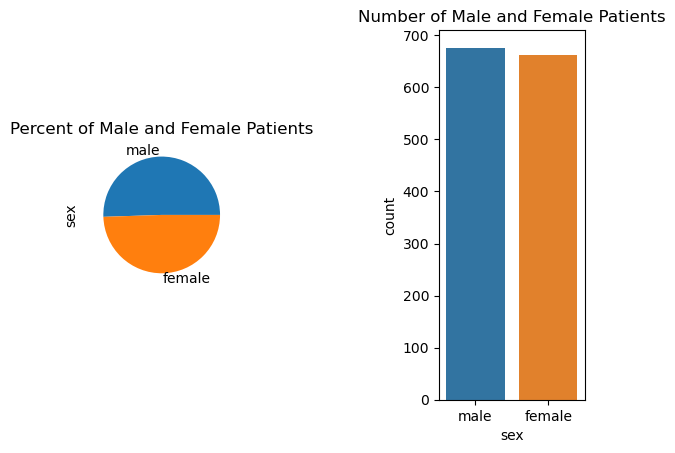

The number of each sex per region is as follows:
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163


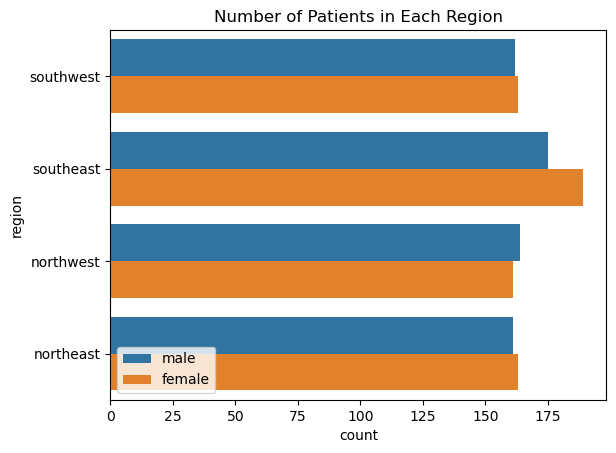

<Figure size 640x480 with 0 Axes>

In [25]:
#Use this to find the number and percent of male/female patients
#print(insurance_df.sex.value_counts())
#print(insurance_df.sex.value_counts(normalize=True))

print('There are 676 male patients and 662 female patients.')
print('The data consists of {} % male patients and {} % female patients.\n'.format(round(0.505232 * 100, 2), round(0.494768 * 100, 2)))

#This code block is for the pie chart.
plt.subplot(1, 3, 1)
insurance_df['sex'].value_counts().plot.pie()
plt.title('Percent of Male and Female Patients')

#This code block is for the count plot.
plt.subplot(1, 3, 3)
sns.countplot(x='sex', data=insurance_df, order=['male', 'female'])
plt.title('Number of Male and Female Patients')

plt.show()
plt.clf()

#This code block is for the contingency table.
print('The number of each sex per region is as follows:')
print(pd.crosstab(insurance_df['sex'], insurance_df['region']))

#This code block is for the grouped count plot.
sns.countplot(data=insurance_df, y="region", hue="sex")
plt.title('Number of Patients in Each Region')
plt.legend(['male', 'female'], loc = 'lower left')
plt.show()
plt.clf()

### Average statistics of male and female patients

#### Average Age

The average age is 38.92 for male patients and 39.5 for female patients. The average age for all patients is 39.21 years.
There is more male patients under the age of 40 than female. The middle 50% of female patients are slightly higher than male patients, but the difference is negligable.


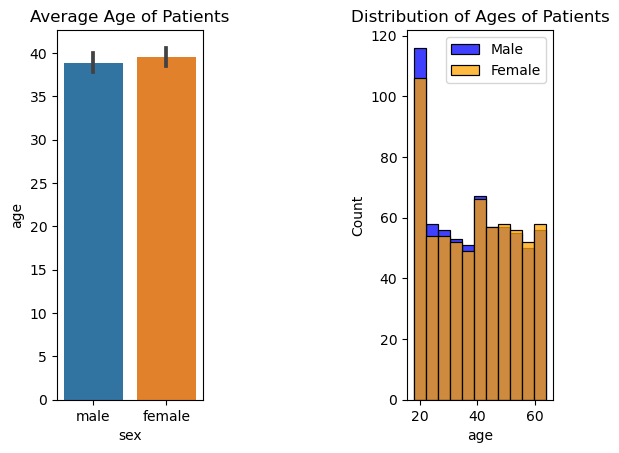

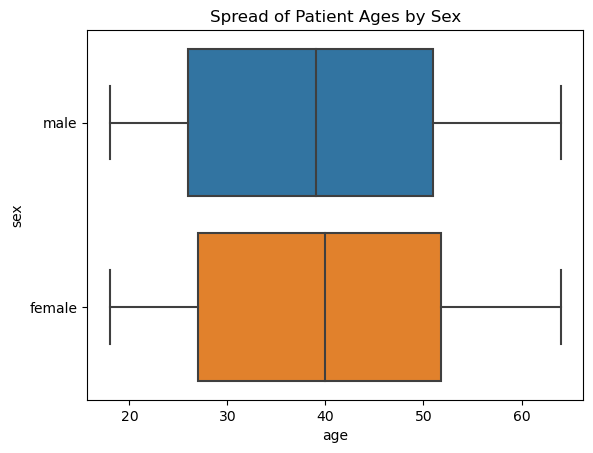

<Figure size 640x480 with 0 Axes>

In [26]:
#Creating separate dataframes of male and female ages
male_df = insurance_df[['age', 'sex']][insurance_df['sex'] == 'male']
female_df = insurance_df[['age', 'sex']][insurance_df['sex'] == 'female']

male_avg_age = round(np.average(male_df.age), 2)
female_avg_age = round(np.average(female_df.age), 2)
all_avg_age = round(np.average(insurance_df['age']), 2)

print('The average age is {} for male patients and {} for female patients. The average age for all patients is {} years.'.format(male_avg_age, female_avg_age, all_avg_age))
print('There is more male patients under the age of 40 than female. The middle 50% of female patients are slightly higher than male patients, but the difference is negligable.')

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = insurance_df, x = 'sex', y = 'age', order=['male', 'female'])
plt.title('Average Age of Patients')

#This code block is for the histogram
plt.subplot(1, 3, 3)
sns.histplot(x='age', data=male_df, color='blue')
sns.histplot(x='age', data=female_df, color='Orange')
plt.title('Distribution of Ages of Patients')
plt.legend(['Male', 'Female'])

plt.show()
plt.clf()

#This code block is for the box plot
sns.boxplot(data = insurance_df, x = 'age', y = 'sex', order = ['male', 'female'])
plt.title('Spread of Patient Ages by Sex')

plt.show()
plt.clf()

#### Average BMI

The average bmi is 30.94 for male patients, 30.38 for female patients, and 30.66 for all patients.
Most male patients tend to have slightly higher bmi's than female patients, but the highest bmi men have moderately higher bmi's than women.


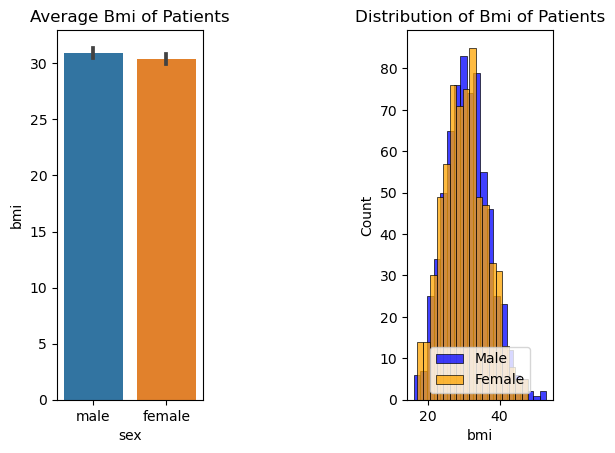

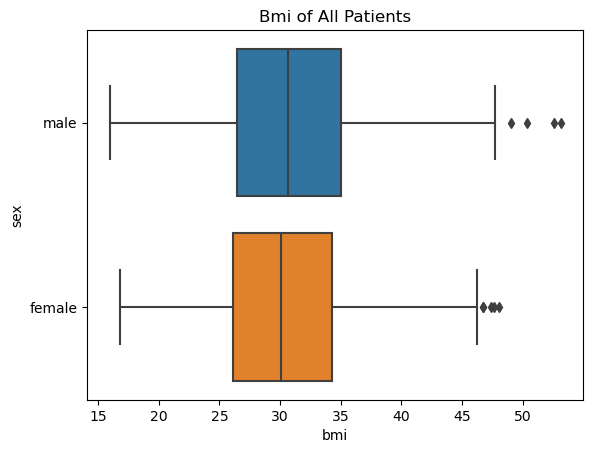

<Figure size 640x480 with 0 Axes>

In [27]:
all_bmi = insurance_df['bmi']
male_bmi = insurance_df[['bmi', 'sex']][insurance_df['sex'] == 'male']
female_bmi = insurance_df[['bmi', 'sex']][insurance_df['sex'] == 'female']

avg_total_bmi = round(np.average(all_bmi), 2)
avg_male_bmi = round(np.average(male_bmi.bmi), 2)
avg_female_bmi = round(np.average(female_bmi.bmi), 2)

print('The average bmi is {} for male patients, {} for female patients, and {} for all patients.'.format(avg_male_bmi, avg_female_bmi, avg_total_bmi))
print('Most male patients tend to have slightly higher bmi\'s than female patients, but the highest bmi men have moderately higher bmi\'s than women.')

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = insurance_df, x = 'sex', y = 'bmi', order=['male', 'female'])
plt.title('Average Bmi of Patients')

#This code block is for the histogram
plt.subplot(1, 3, 3)
sns.histplot(x='bmi', data=male_bmi, color='blue')
sns.histplot(x='bmi', data=female_bmi, color='Orange')
plt.title('Distribution of Bmi of Patients')
plt.legend(['Male', 'Female'], loc = 'lower center')
plt.show()
plt.clf()

#This code block is for the box plot
sns.boxplot(data = insurance_df, x='bmi', y='sex', order=['male', 'female'])
plt.title('Bmi of All Patients')
plt.show()
plt.clf()

#### Average Number of Children

The average number of children for male patients that are parents is 1.93.
The average number of children for female patients that are parents is 1.91.
Most patients report having less than two children.


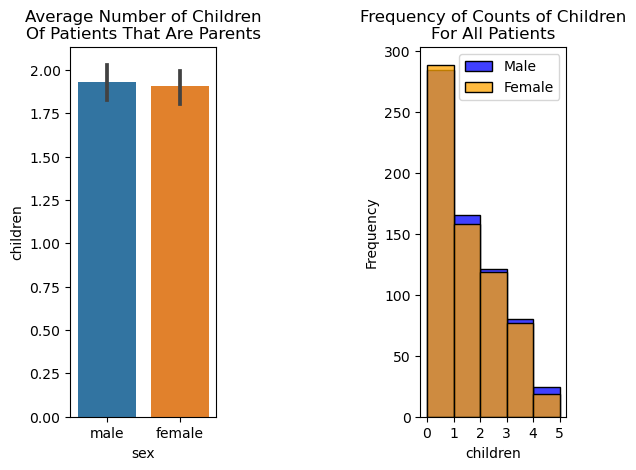

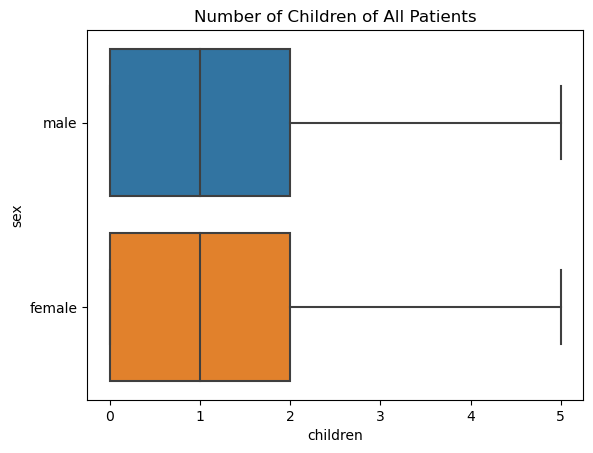

<Figure size 640x480 with 0 Axes>

In [28]:
#Create dataframes of all parents
all_parents = insurance_df[['sex', 'children']].loc[insurance_df['children'] != 0]
male_parents = insurance_df[['sex', 'children']].loc[insurance_df['sex'] == 'male'].loc[insurance_df['children'] != 0]
female_parents = insurance_df[['sex', 'children']].loc[insurance_df['sex'] == 'female'].loc[insurance_df['children'] != 0]

#This gives us the number of children of all patients, including non-parents.
male_patients = insurance_df[['sex', 'children']].loc[insurance_df['sex'] == 'male']
female_patients = insurance_df[['sex', 'children']].loc[insurance_df['sex'] == 'female']

avg_children_all = round(np.average(all_parents['children']), 2)
avg_children_male = round(np.average(male_parents['children']), 2)
avg_children_female = round(np.average(female_parents['children']), 2)

print('The average number of children for male patients that are parents is {}.'.format(avg_children_male))
print('The average number of children for female patients that are parents is {}.'.format(avg_children_female))
print('Most patients report having less than two children.')

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = all_parents, x = 'sex', y = 'children', order=['male', 'female'])
plt.title('Average Number of Children\nOf Patients That Are Parents')

#This code block is for the histogram
plt.subplot(1, 3, 3)
sns.histplot(x='children', data = male_patients, bins = [0, 1, 2, 3, 4, 5], color = 'blue')
sns.histplot(x='children', data = female_patients, bins = [0, 1, 2, 3, 4, 5], color = 'orange')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.title('Frequency of Counts of Children\nFor All Patients')
plt.legend(['Male', 'Female'])
plt.ylabel('Frequency')

plt.show()
plt.clf()

sns.boxplot(data=insurance_df, x='children', y='sex', order = ['male', 'female'])
plt.title('Number of Children of All Patients')
plt.show()
plt.clf()

#### Average Charges Billed by Health Insurance

The average charge billed to health insurance for male patients is $13956.75, $12569.58 for female patients, and $13270.42 for all patients.
The average charge billed to health insurance is approximately $1387.17 more for male patients than female patients.
Charges billed to health insurance for most male patients were less than $40000 and less than $30000 for female patients, however there were still a lot of outliers with charges higher than those.


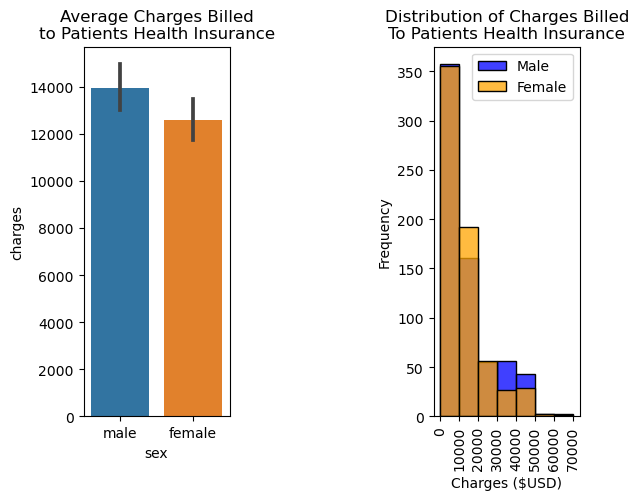

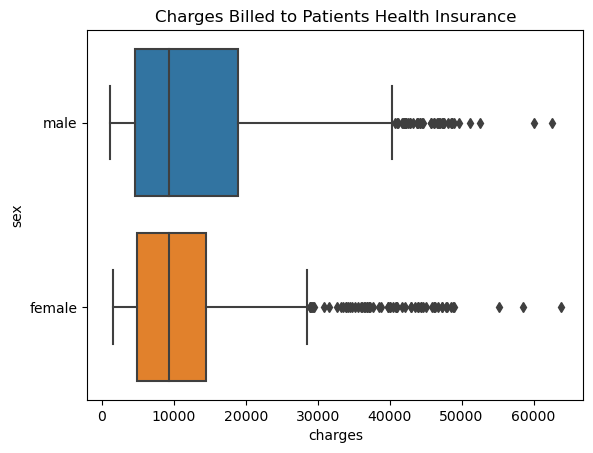

<Figure size 640x480 with 0 Axes>

In [29]:
charges_all = insurance_df['charges']
charges_male = insurance_df[['charges', 'sex']].loc[insurance_df['sex'] == 'male']
charges_female = insurance_df[['charges', 'sex']].loc[insurance_df['sex'] == 'female']

avg_charges_all = round(np.average(charges_all), 2)
avg_charges_male = round(np.average(charges_male.charges), 2)
avg_charges_female = round(np.average(charges_female.charges), 2)

print('The average charge billed to health insurance for male patients is ${}, ${} for female patients, and ${} for all patients.'.format(avg_charges_male, avg_charges_female, avg_charges_all))
print('The average charge billed to health insurance is approximately ${} more for male patients than female patients.'.format(avg_charges_male - avg_charges_female))
print('Charges billed to health insurance for most male patients were less than $40000 and less than $30000 for female patients, however there were still a lot of outliers with charges higher than those.')

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = insurance_df, x = 'sex', y = 'charges', order=['male', 'female'])
plt.title('Average Charges Billed\nto Patients Health Insurance')

#This code block is for the histogram
charges_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
plt.subplot(1, 3, 3)
sns.histplot(x='charges', data = charges_male, bins = charges_bins, color = 'blue')
sns.histplot(x='charges', data = charges_female, bins = charges_bins, color = 'orange')
plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], rotation = 90)
plt.title('Distribution of Charges Billed\nTo Patients Health Insurance')
plt.legend(['Male', 'Female'])
plt.xlabel('Charges ($USD)')
plt.ylabel('Frequency')
plt.show()
plt.clf()

sns.boxplot(data = insurance_df, x = 'charges', y = 'sex', order=['male', 'female'])
plt.title('Charges Billed to Patients Health Insurance')
plt.show()
plt.clf()

#### Percentage of Men, Women, and Total Patients That Smoke.

There are 159 male smokers. 23.52 percent of male patients are smokers.
There are 115 female smokers. 17.37 percent of female patients are smokers.
There are 274 total smokers. 20.48 percent of all patients are smokers.


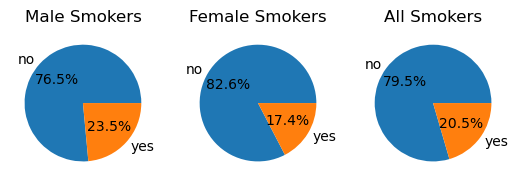

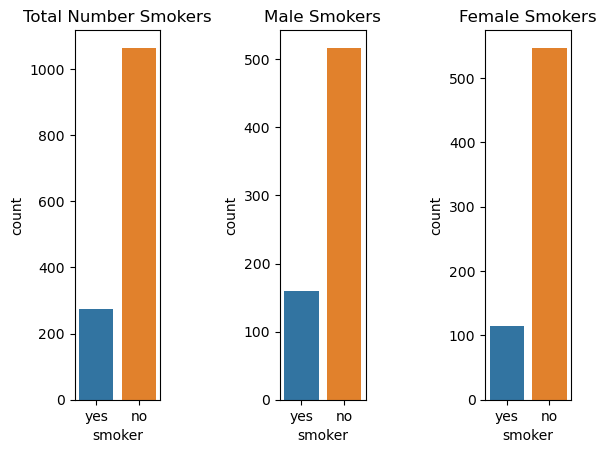

<Figure size 640x480 with 0 Axes>

In [30]:
num_male_smokers = len(insurance_df['smoker'].loc[insurance_df['sex'] == 'male'].loc[insurance_df['smoker'] == 'yes'])
num_male_non_smokers = insurance_df['smoker'][insurance_df['sex'] == 'male'].value_counts()['no']

male_smokers = insurance_df[['sex', 'smoker']].loc[insurance_df['sex'] == 'male']
female_smokers = insurance_df[['sex', 'smoker']].loc[insurance_df['sex'] == 'female']

num_female_smokers = insurance_df['smoker'][insurance_df['sex'] == 'female'].value_counts()['yes']
num_female_non_smokers = insurance_df['smoker'][insurance_df['sex'] == 'female'].value_counts()['no']

num_total_smokers = (num_male_smokers + num_female_smokers)
num_non_smokers = insurance_df['smoker'].value_counts()['no']

percent_male_smokers = (num_male_smokers / len(male_patients)) * 100
percent_male_non_smokers = (num_male_non_smokers / len(male_patients)) * 100

percent_female_smokers = (num_female_smokers / len(female_patients)) * 100
percent_female_non_smokers = (num_female_non_smokers / len(female_patients)) * 100

percent_total_smokers = (num_total_smokers / len(insurance_df)) * 100
percent_total_non_smokers = (num_non_smokers / len(insurance_df)) * 100

print('There are {} male smokers. {} percent of male patients are smokers.'.format(num_male_smokers, round(percent_male_smokers, 2)))
print('There are {} female smokers. {} percent of female patients are smokers.'.format(num_female_smokers, round(percent_female_smokers, 2)))
print('There are {} total smokers. {} percent of all patients are smokers.'.format(num_total_smokers, round(percent_total_smokers, 2)))

#This code block is for the first pie chart.
plt.subplot(1, 3, 1)
insurance_df['smoker'].loc[insurance_df['sex'] == 'male'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Male Smokers')
plt.ylabel('')

#This code block is for the second pie chart.
plt.subplot(1, 3, 2)
insurance_df['smoker'].loc[insurance_df['sex'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Female Smokers')
plt.ylabel('')

#This code block is for the third pie chart.
plt.subplot(1, 3, 3)
insurance_df['smoker'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('All Smokers')
plt.ylabel('')

plt.show()
plt.clf()

#This code block is for the countplot.
plt.subplot(1, 5, 1)
sns.countplot(x='smoker', data=insurance_df, order=['yes', 'no'])
plt.title('Total Number Smokers')

plt.subplot(1, 5, 3)
sns.countplot(x='smoker', data=male_smokers, order=['yes', 'no'])
plt.title('Male Smokers')

plt.subplot(1, 5, 5)
sns.countplot(x='smoker', data=female_smokers, order=['yes', 'no'])
plt.title('Female Smokers')
plt.show()
plt.clf()

#### Most Common Regions for Patients

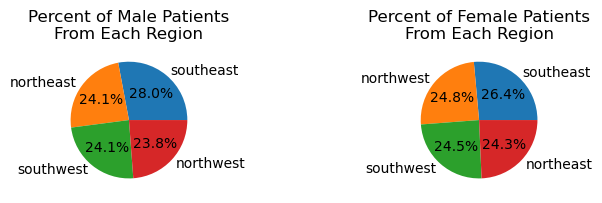

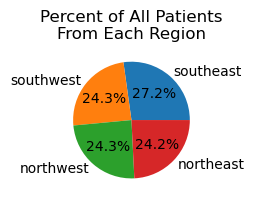

<Figure size 640x480 with 0 Axes>

In [31]:
#This code is for the first pie chart.
plt.subplot(1, 3, 1)
insurance_df['region'].loc[insurance_df['sex'] == 'male'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of Male Patients\nFrom Each Region')
plt.ylabel('')

#This code is for the second pie chart.
plt.subplot(1, 3, 3)
insurance_df['region'].loc[insurance_df['sex'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of Female Patients\nFrom Each Region')
plt.ylabel('')

plt.show()
plt.clf()

#This code is for the second pie chart.
plt.subplot(1, 3, 1)
insurance_df['region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of All Patients\nFrom Each Region')
plt.ylabel('')

plt.show()
plt.clf()

#### Region With Highest Average BMI

The region that contains the highest average bmi is the southeast region with an average of 33.36 bmi.


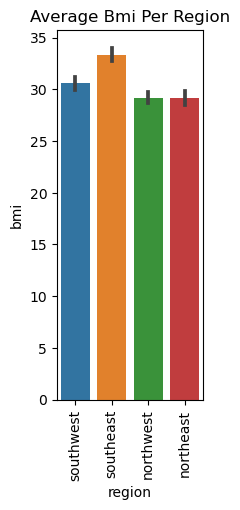

<Figure size 640x480 with 0 Axes>

In [32]:
#find the average bmi of each region
nw_avg_bmi = round(sum(insurance_df['bmi'].loc[insurance_df['region'] == 'northwest']) / 325, 2)
ne_avg_bmi = round(sum(insurance_df['bmi'].loc[insurance_df['region'] == 'northeast']) / 324, 2)
sw_avg_bmi = round(sum(insurance_df['bmi'].loc[insurance_df['region'] == 'southwest']) / 325, 2)
se_avg_bmi = round(sum(insurance_df['bmi'].loc[insurance_df['region'] == 'southeast']) / 364, 2)

#Use the code below to view which regions bmi is highest
#print(nw_avg_bmi, ne_avg_bmi, sw_avg_bmi, se_avg_bmi)

print('The region that contains the highest average bmi is the {} region with an average of {} bmi.'.format('southeast', se_avg_bmi))

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = insurance_df, x = 'region', y = 'bmi')
plt.title('Average Bmi Per Region')
plt.xticks(rotation=90)
plt.show()
plt.clf()

#### Region With Highest Average Number of Children

The average number of children in the northwest region is 1.15.
The average number of children in the northeast region is 1.05.
The average number of children in the southwest region is 1.14.
The average number of children in the southeast region is 1.05.


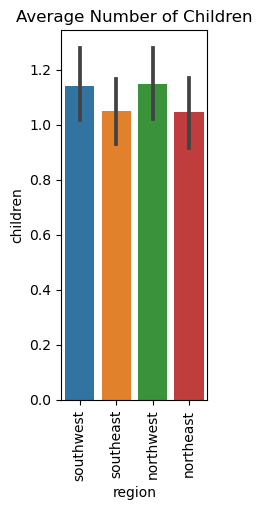

<Figure size 640x480 with 0 Axes>

In [33]:
nw_avg_children = round(np.average(insurance_df['children'].loc[insurance_df['region'] == 'northwest']), 2)
ne_avg_children = round(np.average(insurance_df['children'].loc[insurance_df['region'] == 'northeast']), 2)
sw_avg_children = round(np.average(insurance_df['children'].loc[insurance_df['region'] == 'southwest']), 2)
se_avg_children = round(np.average(insurance_df['children'].loc[insurance_df['region'] == 'southeast']), 2)

print('The average number of children in the northwest region is {}.'.format(nw_avg_children))
print('The average number of children in the northeast region is {}.'.format(ne_avg_children))
print('The average number of children in the southwest region is {}.'.format(sw_avg_children))
print('The average number of children in the southeast region is {}.'.format(se_avg_children))

#This code block is for the bar chart
plt.subplot(1, 3, 1)
sns.barplot(data = insurance_df, x = 'region', y = 'children')
plt.title('Average Number of Children')
plt.xticks(rotation=90)
plt.show()
plt.clf()

#### Region With The Highest Number of Patients That Smoke

The region with the highest number of patients that smoke is the southeast region with 91 smokers.


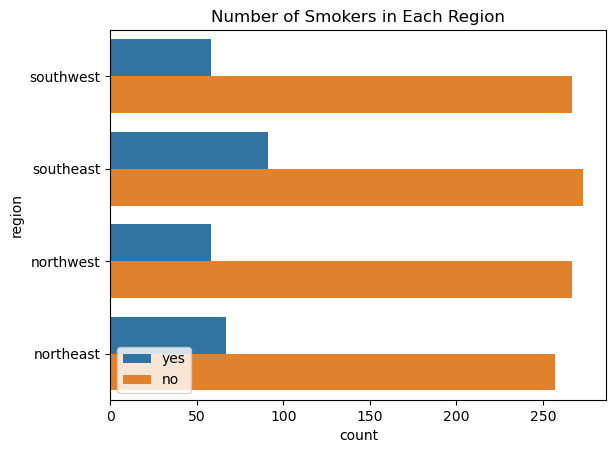

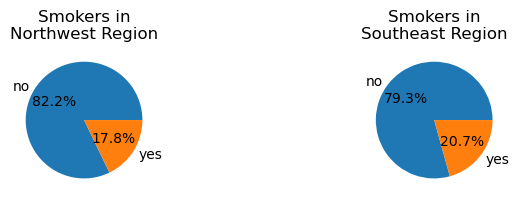

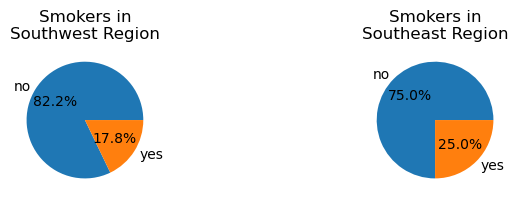

<Figure size 640x480 with 0 Axes>

In [34]:
print('The region with the highest number of patients that smoke is the southeast region with 91 smokers.')

#This code block is for the grouped count plot.
sns.countplot(data=insurance_df, y="region", hue="smoker")
plt.title('Number of Smokers in Each Region')
plt.legend(['yes', 'no'], loc = 'lower left')
plt.show()
plt.clf()

#This code block is for the northwest pie chart.
plt.subplot(1, 3, 1)
insurance_df['smoker'].loc[insurance_df['region'] == 'northwest'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smokers in\nNorthwest Region')
plt.ylabel('')

#This code block is for the northeast pie chart.
plt.subplot(1, 3, 3)
insurance_df['smoker'].loc[insurance_df['region'] == 'northeast'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smokers in\nSoutheast Region')
plt.ylabel('')

plt.show()
plt.clf()

#This code block is for the southwest pie chart.
plt.subplot(1, 3, 1)
insurance_df['smoker'].loc[insurance_df['region'] == 'southwest'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smokers in\nSouthwest Region')
plt.ylabel('')

#This code block is for the southeast pie chart.
plt.subplot(1, 3, 3)
insurance_df['smoker'].loc[insurance_df['region'] == 'southeast'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smokers in\nSoutheast Region')
plt.ylabel('')

plt.show()
plt.clf()


#### Association between bmi and number of children:

PearsonRResult(statistic=0.012758900820673772, pvalue=0.641010396026421)
A pearson correlation coefficient of 0.3 suggests a linear association and 0.6 suggests a strong linear correlation. The pearson correlation coefficient between bmi and number of children is 0.01 which suggests there is no correlation. The scatterplot below confirms this assumption.


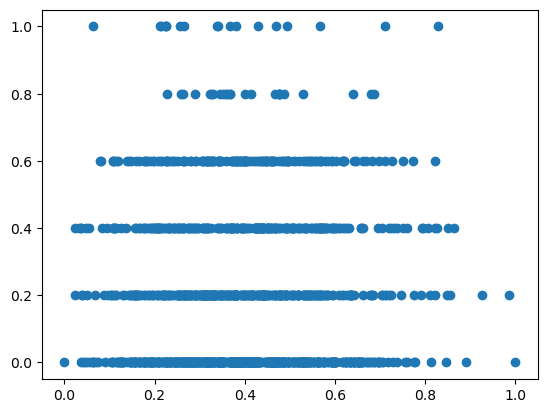

<Figure size 640x480 with 0 Axes>

In [35]:
#Calculate the pearson correlation coefficient which will show if there is a linear correlation.
bmi_child_assoc= pearsonr(insurance_df.bmi, insurance_df.children)
print(bmi_child_assoc)
print('A pearson correlation coefficient of 0.3 suggests a linear association and 0.6 suggests a strong linear correlation. The pearson correlation coefficient between bmi and number of children is 0.01 which suggests there is no correlation. The scatterplot below confirms this assumption.')

#Normalize the data because it exists on different scales
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(insurance_df[['bmi', 'children']])
normalized_df = pd.DataFrame(normalized_data, columns = ['bmi', 'children'])

#Create scatterplot
plt.scatter(normalized_df.bmi, normalized_df.children)
plt.show()
plt.clf()

#### Association between bmi and amount billed to patients health insurance:

PearsonRResult(statistic=0.19834096883362912, pvalue=2.459085535117846e-13)
The pearson correlation coefficient is 0.19 which suggests a mild but not statistically significant positive linear correlation. The scatterplot below confirms this assumption.


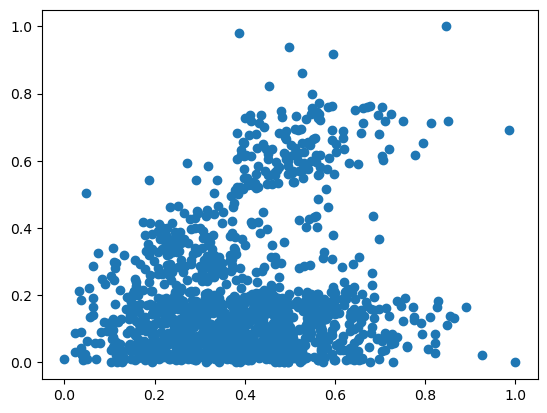

<Figure size 640x480 with 0 Axes>

In [36]:
#Calculate the pearson correlation coefficient which will show if there is a linear correlation.
bmi_charges_assoc= pearsonr(insurance_df.bmi, insurance_df.charges)
print(bmi_charges_assoc)
print('The pearson correlation coefficient is 0.19 which suggests a mild but not statistically significant positive linear correlation. The scatterplot below confirms this assumption.')

#Normalize the data because it exists on different scales
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(insurance_df[['bmi', 'charges']])
normalized_df = pd.DataFrame(normalized_data, columns = ['bmi', 'charges'])

#Create scatterplot
plt.scatter(normalized_df.bmi, normalized_df.charges)
plt.show()
plt.clf()